# 1.KNN算法：K最近邻(kNN，k-NearestNeighbor)分类算法

![title](pic/1.png)

# 2.Algorithm

![title](pic/2.png)

# 3.关于K的取值

![title](pic/3.png)

# 4.K的取法：#
 　　常用的方法是从k=1开始，使用检验集估计分类器的误差率。重复该过程，每次K增值1，允许增加一个近邻。选取产生最小误差率的K。

　　一般k的取值不超过20，上限是n的开方，随着数据集的增大，K的值也要增大。

 

# 5.关于距离的选取

![title](pic/4.png)

![title](pic/5.png)

# 6.总结

![title](pic/6.png)

# 代码部分：

In [1]:
import numpy as np
import operator

In [2]:
#构建简单数据集
def creatDataSet():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])    #已分类数据坐标,4个点 2个类
    labels=['A','A','B','B']                               #tag for every dataset
    return group,labels

In [3]:
creatDataSet()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [4]:
def classify0(inX,dataSet,labels,k):       #inX 分类目标
    #计算inX与每个点的距离
    diffmat=dataSet-inX                                
    sqdiffmat=diffmat**2
    sqdiffmat=np.sum(sqdiffmat,axis=1)
    distance=sqdiffmat**0.5
    
    sorteddistanceindex=distance.argsort()   #根据以上计算的距离排序
    ans={}
    for i in range(k):                  #对比前K个数据，对类别计数
        ans[labels[sorteddistanceindex[i]]] =ans.get(labels[sorteddistanceindex[i]],0)+1  
        # vote=labels[sorteddistanceindex[i]]
        # ans[vote]=ans.get(vote,0)+1
    sortedclasscount=sorted(ans.items(),key=operator.itemgetter(1),reverse=True)  #对ans排序，从大到小,itemgetter决定根据哪个元素排序
    return sortedclasscount[0][0]  #返回次数最多的类，注意sorted返回的是一个list

![title](pic/sorted.png)

In [5]:
def file2matrix(filename):    #读取数据，分别存储数据行和对应label
    fr=open(filename)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    returnMat=np.zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()            #去掉头尾空格等标识符
        linesplit=line.split('\t')   #按\t分割，返回结果为列表[]
        returnMat[index,:]=linesplit[0:3]    
        classLabelVector.append(linesplit[-1])  #每行数据最后一列为tag
        index+=1
    return  returnMat,np.array(classLabelVector)

In [6]:
returnMat,label=file2matrix('data/datingTestSet.txt')

In [7]:
import matplotlib.pyplot as plt
from pylab import mpl 

In [8]:
def plot_KNN(datingDataMat,datingLabels,n,m):    #对数据可视化
    fig = plt.figure()
    ax = fig.add_subplot(111)
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    kind = list(set(datingLabels))
    markers = ['o', '*', '+', 'x', 's', 'p', 'h']
    col = ['b', 'r', 'g', 'c', 'y', 'm', 'k']
    label_3 = [r'不喜欢', r'一般', r'特别']
    for i in range(len(kind)):
        xx = datingDataMat[datingLabels == kind[i]]
        yy = datingDataMat[datingLabels == kind[i]]
        plt.scatter(xx[:, n], yy[:, m], marker=markers[i], c=col[i], label=label_3[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

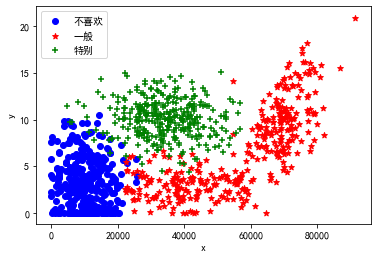

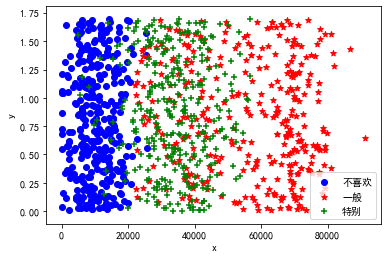

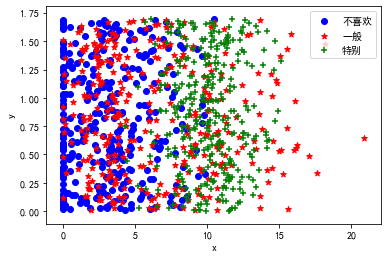

In [9]:
plot_KNN(returnMat,label,0,1)
plot_KNN(returnMat,label,0,2)
plot_KNN(returnMat,label,1,2)

In [10]:
#数据归一化
def autoNorm(dataset):
    minval=dataset.min(0)
    maxval=dataset.max(0)
    newval=(dataset-minval)/(maxval-minval)
    return newval

In [11]:
def datingClassTest(filename,test_ratio=0.1,k=3):  #测试集比例为10%
    datingDataMat,datingLabels=file2matrix(filename)
    normMat=autoNorm(datingDataMat)
    m=normMat.shape[0]
    test_num=int(test_ratio*m)
    count=0.0
    for i in range(test_num): 
        classify_ans=classify0(normMat[i,:],normMat[test_num:m,:],
                               datingLabels[test_num:m],k)
        print('the classifier came back with {:},real:{:}'.format(classify_ans,datingLabels[i]))  #对测试集分类
        if classify_ans!=datingLabels[i]:    #对比分类正确性，记录错误次数
            count+=1.0
    print('error:{:.3f}'.format(count/test_num)) 

In [12]:
datingClassTest('data/datingTestSet2.txt')

the classifier came back with 3,real:3
the classifier came back with 2,real:2
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 3,real:3
the classifier came back with 3,real:3
the classifier came back with 1,real:1
the classifier came back with 3,real:3
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 2,real:2
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 1,real:1
the classifier came back with 2,real:2
the classifier came back with 3,real:3
the classifier came back with 2,real:2
the classifier came back with 1,real:1
the classifier came back with 3,real:2
the classifier came back with 3,real:3
the classifier came back with 2,real:2
the classifier came back 

In [26]:
def img2vector(filename): #处理单个文件，转化为一行
    vector=np.zeros((1,1024))
    fr=open(filename)
    for i in range(32):  #每个数据都是32*32
        line=fr.readline() #读一行
        for j in range(32):#存下这一行
            vector[0,32*i+j]=int(line[j]) 
    return vector

In [15]:
import os

In [16]:
def handwritingClassTest(trainpath=r'yourpath',testpath=r'yourpath'): #将yourpath 改为自己存放数据的路径
    hwLabels=[]
    trainingFileList=os.listdir(trainpath) # 返回[....]
    m=len(trainingFileList)              
    trainMat=np.zeros((m,1024))     #总的training实例数据数量
    for i in range(m):              #处理label
        fileNameStr=trainingFileList[i]        
        label=int(fileNameStr.split('_')[0]) 
        hwLabels.append(label)
        trainMat[i,:]=img2vector('{}/{:s}'.format(trainpath,fileNameStr))
    testFileList=os.listdir(testpath)
    error=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr=testFileList[i]
        classNumStr=int(fileNameStr.split('_')[0])
        vectorUnderTest=img2vector('{}/{:s}'.format(testpath,fileNameStr))
        classifierResult=classify0(vectorUnderTest,trainMat,hwLabels,3)
        print('the pre:%d,  the real:%d'%(classifierResult,classNumStr))
        if classifierResult!=classNumStr:
            error+=1
    print('error rate:%f'%(error/mTest))

![title](pic/os.png)

In [17]:
handwritingClassTest('data/trainingDigits/','data/testDigits/')

the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0,  the real:0
the pre:0, 

the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4,  the real:4
the pre:4, 

the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:7,  the real:7
the pre:8,  the real:8
the pre:8, 